<a href="https://colab.research.google.com/github/DhivyaaSP/Deep-Learning/blob/main/Exe_2_2_1_Optimal_Epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/1000, Training Loss: 0.010264724937080203, Test Loss: 0.010645494261191445
Epoch 2/1000, Training Loss: 0.005860006093476426, Test Loss: 0.005940389072779067
Epoch 3/1000, Training Loss: 0.004609325654041268, Test Loss: 0.00456736454626989
Epoch 4/1000, Training Loss: 0.004059551214323992, Test Loss: 0.003949569904949446
Epoch 5/1000, Training Loss: 0.0037641188270975245, Test Loss: 0.0036102733821172205
Epoch 6/1000, Training Loss: 0.003585671202886375, Test Loss: 0.0034009595067596254
Epoch 7/1000, Training Loss: 0.0034692747254009594, Test Loss: 0.00326155758144251
Epoch 8/1000, Training Loss: 0.0033891008535588225, Test Loss: 0.0031635248343623067
Epoch 9/1000, Training Loss: 0.0033315826969126027, Test Loss: 0.003091716772401834
Epoch 10/1000, Training Loss: 0.0032889929581125664, Test Loss: 0.0030374224373148967
Epoch 11/1000, Training Loss: 0.0032566493685401605, Test Loss: 0.0029953122230583175
Epoch 12/1000, Training Loss: 0.003231572568969852, Test Loss: 0.00296196212

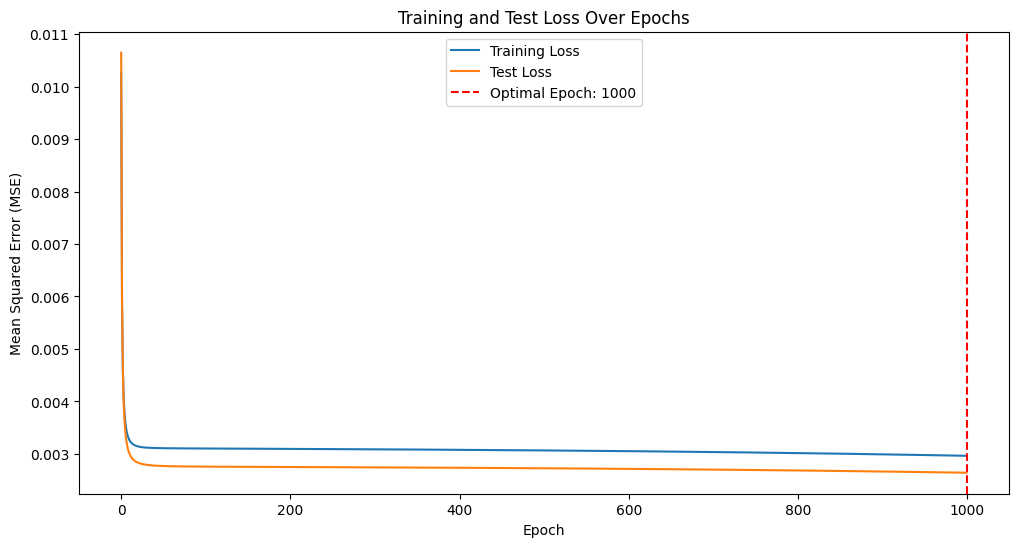

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MLP class with one hidden layer
class MLP:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Initialize the number of nodes in each layer
        self.input_nodes = input_nodes + 1  # Including bias
        self.hidden_nodes = hidden_nodes + 1  # Including bias
        self.output_nodes = output_nodes

        # Initialize weights with random values
        self.weights_input_hidden = np.random.rand(self.input_nodes, self.hidden_nodes - 1) - 0.5
        self.weights_hidden_output = np.random.rand(self.hidden_nodes, self.output_nodes) - 0.5

        # Include bias in the inputs
        self.bias_input = np.random.rand(self.input_nodes) - 0.5
        self.bias_hidden = np.random.rand(self.hidden_nodes) - 0.5

        # Initialize lists to store training and test losses
        self.training_loss_history = []
        self.test_loss_history = []

    def forward_pass(self, inputs):
        # Add bias to inputs
        inputs_with_bias = np.concatenate((inputs, [1]), axis=0)

        # Compute input and output for the hidden layer
        self.hidden_input = np.dot(inputs_with_bias, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        # Add bias to hidden layer outputs
        hidden_output_with_bias = np.concatenate((self.hidden_output, [1]), axis=0)

        # Compute input and output for the output layer
        self.final_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward_pass(self, inputs, expected_output, output, learning_rate):
        # Compute error
        error = expected_output - output

        # Gradient for output weights
        d_weights_hidden_output = np.dot(np.concatenate((self.hidden_output, [1]), axis=0).reshape(-1,1),
                                         error * sigmoid_derivative(output).reshape(1, -1))

        # Error for hidden layer
        hidden_error = np.dot(self.weights_hidden_output, error * sigmoid_derivative(output))[:-1]

        # Gradient for input weights
        d_weights_input_hidden = np.dot(np.concatenate((inputs, [1]), axis=0).reshape(-1,1),
                                        hidden_error * sigmoid_derivative(self.hidden_output).reshape(1, -1))

        # Update the weights
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.weights_input_hidden += learning_rate * d_weights_input_hidden

    def train_and_evaluate(self, dataset, test_inputs, test_expected_output, max_epochs, learning_rate):
        # Split dataset into inputs and expected outputs
        inputs = dataset[:, :2]
        expected_output = dataset[:, 2:]

        # Initialize variables to track optimal epoch and minimum test loss
        optimal_epoch = None
        min_test_loss = float('inf')

        # Training loop
        for epoch in range(max_epochs):
            for j in range(inputs.shape[0]):
                input_sample = inputs[j]
                output = self.forward_pass(input_sample)
                self.backward_pass(input_sample, expected_output[j], output, learning_rate)

            # Calculate training loss
            training_loss = np.mean(np.square(expected_output - self.predict(inputs)))
            self.training_loss_history.append(training_loss)

            # Calculate test loss
            test_loss = np.mean(np.square(test_expected_output - self.predict(test_inputs)))
            self.test_loss_history.append(test_loss)

            # Check if test loss is minimized
            if test_loss < min_test_loss:
                min_test_loss = test_loss
                optimal_epoch = epoch + 1

            # Print out progress
            print(f"Epoch {epoch+1}/{max_epochs}, Training Loss: {training_loss}, Test Loss: {test_loss}")

        return optimal_epoch

    def predict(self, inputs):
        outputs = np.array([self.forward_pass(input_sample) for input_sample in inputs])
        return outputs

# Function to calculate the multivariate normal density
def multivariate_gaussian_density(x, mu, cov):
    n = mu.shape[0]
    diff = x - mu
    return (1. / (np.sqrt((2 * np.pi)**n * np.linalg.det(cov)))) * \
           np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))

# Parameters for the Gaussian
mu_x = np.array([0, 0])
cov_x = np.array([[0.3, -0.5],
                  [-0.5, 2]])

# Generate N training samples randomly
N = 200
samples = np.zeros((N, 3))
samples[:, 0] = np.random.uniform(-2, 2, N)  # x1
samples[:, 1] = np.random.uniform(-4, 4, N)  # x2

# Calculate the function value for each sample
for i in range(N):
    samples[i, 2] = multivariate_gaussian_density(samples[i, :2], mu_x, cov_x)

# Generate new test data
N_test = 100  # Change this to your dataset size for testing
test_samples = np.zeros((N_test, 3))
test_samples[:, 0] = np.random.uniform(-2, 2, N_test)  # x1 range
test_samples[:, 1] = np.random.uniform(-4, 4, N_test)  # x2 range

for i in range(N_test):
    test_samples[i, 2] = multivariate_gaussian_density(test_samples[i, :2], mu_x, cov_x)

# Initialize the MLP
mlp = MLP(input_nodes=2, hidden_nodes=10, output_nodes=1)
optimal_epoch = mlp.train_and_evaluate(samples, test_samples[:, :2], test_samples[:, 2:], max_epochs=1000, learning_rate=0.1)

print(f"Optimal Epoch: {optimal_epoch}")

# Plot training and test loss history in a single graph
plt.figure(figsize=(12, 6))
plt.plot(mlp.training_loss_history, label='Training Loss')
plt.plot(mlp.test_loss_history, label='Test Loss')
plt.axvline(x=optimal_epoch, color='r', linestyle='--', label=f'Optimal Epoch: {optimal_epoch}')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()
